Extracted BOA data from tikvah analysis

In [4]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# Configure your database connection
db_host = 'localhost'
db_port = '5432'
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'ocho'
# Create the database URL
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Load the CSV file into a DataFrame
Boa_data_filepath = '../data/bank_ads.csv'
Boa_data = pd.read_csv(Boa_data_filepath)

# Write the DataFrame to a new table in the PostgreSQL database
Boa_data .to_sql('bank_ads', engine, if_exists='replace', index=False)

print("Data saved successfully.")

Data saved successfully.


In [7]:
# Function to load data from the database
def load_data(engine):
    
    Boa_data = pd.read_sql('SELECT * FROM bank_ads', engine)
    return  Boa_data

In [8]:
# Print the first few rows of each DataFrame
print("DataFrame for tickvah_ads:")
print(Boa_data.head())
print("\n")

DataFrame for tickvah_ads:
                  date                          post_link    view  post_hour  \
0  2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  250563          7   
1  2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280453         13   
2  2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304613         10   
3  2024-04-30 17:01:34  https://t.me/tikvahethiopia/87344  234559         17   
4  2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263872         18   

  bank time_of_day  
0  BOA     Morning  
1  BOA   Afternoon  
2  BOA     Morning  
3  BOA   Afternoon  
4  BOA     Evening  




In [9]:
def data_summary( Boa_data):
    print("Ads Data Summary:")
    print( Boa_data.describe())

In [10]:
# Convert the 'Post Hour' column to string format
Boa_data['Post Hour'] = Boa_data['Post Hour'].astype(str)

KeyError: 'Post Hour'

In [11]:
# Assessing Missing Values
def missing_values(Boa_data):
 missing_values = Boa_data.isnull().sum()
 print("Missing Values:")
 print(missing_values)

In [12]:
missing_values(Boa_data)

Missing Values:
date           0
post_link      0
view           0
post_hour      0
bank           0
time_of_day    0
dtype: int64


In [15]:
# Checking Data Consistency
def check_consistency(Boa_data):
 date_consistency = Boa_data['date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).notnull().all()
 print("Date Consistency:", date_consistency)

In [16]:
check_consistency(Boa_data)

Date Consistency: True


In [21]:
# Checking Data Integrity
def check_data_integrity(Boa_data):
 valid_urls = Boa_data['post_link'].str.startswith('https://t.me/tikvahethiopia/').all()
 print("Valid URLs:", valid_urls)

 non_negative_views = (Boa_data['view'] >= 0).all()
 print("Non-negative Views:", non_negative_views)

In [22]:
check_data_integrity(Boa_data)

Valid URLs: True
Non-negative Views: True


In [23]:
# Checking Data Duplicates
def check_data_duplicate(Boa_data):
 duplicates = Boa_data.duplicated().sum()
 print("Duplicate Records:", duplicates)

In [24]:
check_data_duplicate(Boa_data)

Duplicate Records: 0


In [27]:
# Data Range Validation
def check_data_range(Boa_data):
 view_range_valid = (Boa_data['view'] >= 0) & (Boa_data['view'] <= 1000000)
 print("View Range Validation:")
 print(view_range_valid)

In [28]:
check_data_range(Boa_data)

View Range Validation:
0      True
1      True
2      True
3      True
4      True
       ... 
139    True
140    True
141    True
142    True
143    True
Name: view, Length: 144, dtype: bool


Time-based Analysis

In [29]:
def date_analysis(Boa_data):
 Boa_data['date'] = pd.to_datetime(Boa_data['date'])
 Boa_data['Weekday'] = Boa_data['date'].dt.weekday
 Boa_data['Month'] = Boa_data['date'].dt.month
 Boa_data['Year'] = Boa_data['date'].dt.year
 print(Boa_data.head())




In [30]:
date_analysis(Boa_data)

                 date                          post_link    view  post_hour  \
0 2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  250563          7   
1 2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280453         13   
2 2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304613         10   
3 2024-04-30 17:01:34  https://t.me/tikvahethiopia/87344  234559         17   
4 2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263872         18   

  bank time_of_day  Weekday  Month  Year  
0  BOA     Morning        1      5  2024  
1  BOA   Afternoon        4      5  2024  
2  BOA     Morning        1      5  2024  
3  BOA   Afternoon        1      4  2024  
4  BOA     Evening        4      4  2024  


In [31]:
# Group data by year and calculate the total views
def group_data(Boa_data):
 yearly_views = Boa_data.groupby('Year')['view'].sum()

# Create a line chart
 plt.plot(yearly_views.index, yearly_views.values, marker='o')
 plt.xlabel('Year')
 plt.ylabel('Total Views')
 plt.title('Total Views by Year')
 plt.grid(True)
 plt.show()

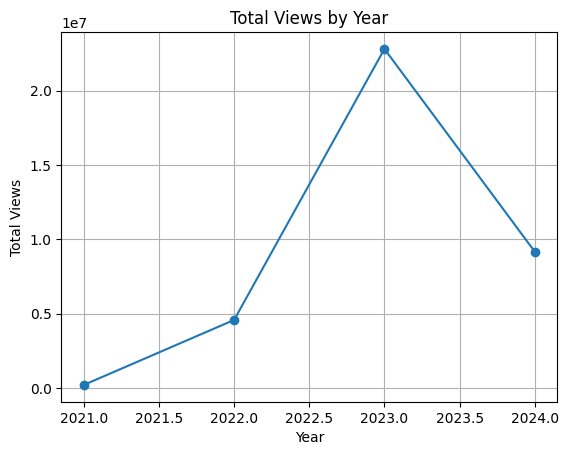

In [32]:
group_data(Boa_data)

In [33]:
# Grouping and Aggregation
def group_aggregation(Boa_data):
 grouped_by_time = Boa_data['time_of_day'].value_counts().sort_index()

# Create a time series chart
 plt.plot(grouped_by_time.index, grouped_by_time.values, marker='o')
 plt.xlabel('Time of day')
 plt.ylabel('Count')
 plt.title('Number of Posts by Time of Day')
 plt.grid(True)
 plt.xticks(rotation=45)
 plt.show()

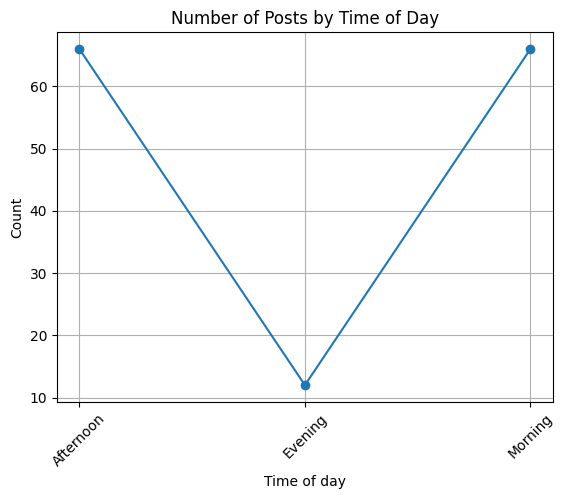

In [34]:
group_aggregation(Boa_data)

In [36]:
# Data Filtering for specific period of time 
def filter_data(Boa_data):
 filtered_data = Boa_data[(Boa_data['date'] >= '2022-01-01') & (Boa_data['view'] > 250000)]
 print(filtered_data)

In [37]:
filter_data(Boa_data)

                   date                          post_link    view  post_hour  \
0   2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  250563          7   
1   2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280453         13   
2   2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304613         10   
4   2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263872         18   
5   2024-04-23 14:23:46  https://t.me/tikvahethiopia/87134  293085         14   
..                  ...                                ...     ...        ...   
114 2023-01-24 11:14:12  https://t.me/tikvahethiopia/76064  273388         11   
118 2023-01-20 06:55:11  https://t.me/tikvahethiopia/75961  554119          6   
119 2023-01-14 16:15:16  https://t.me/tikvahethiopia/75848  276062         16   
120 2023-01-13 16:02:56  https://t.me/tikvahethiopia/75829  251027         16   
132 2022-05-05 15:27:35  https://t.me/tikvahethiopia/69952  254441         15   

    bank time_of_day  Weekd


Bivariate Analysis


In [42]:
# Date vs. View
def date_view( Boa_data):
 date_vs_view = Boa_data[['Year', 'view']]
 date_vs_view.plot(x='Year', y='view', kind='line')

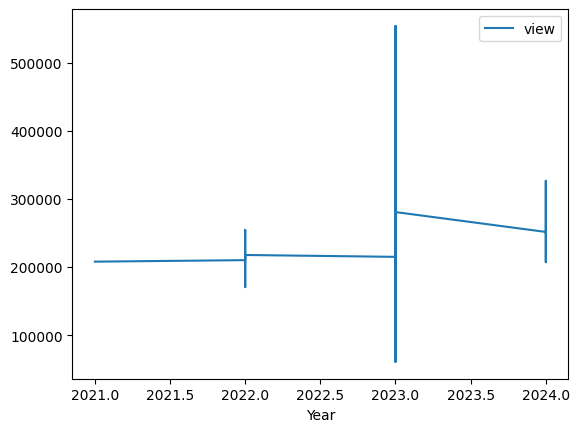

In [43]:
date_view( Boa_data)

In [46]:

# Bank vs. View
def bank_view( Boa_data):
 bank_vs_view = Boa_data[['bank', 'view']]
 bank_vs_view.plot(x='bank', y='view', kind='bar')

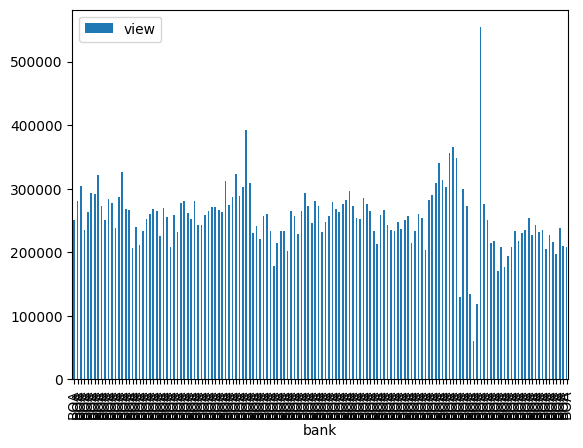

In [47]:
bank_view( Boa_data)

In [30]:
# Convert 'Date' column to datetime format
def date_to_datetime(Boa_data):
 Boa_data['Date'] = pd.to_datetime(Boa_data['Date'], dayfirst=True)

In [48]:
# Data Comparison
# Calculate total views per date
def total_views_per_date(Boa_data):
    views_per_date = Boa_data.groupby('date')['view'].sum()

    # Plot trends over time
    plt.figure(figsize=(12, 6))
    plt.plot(views_per_date.index, views_per_date.values, marker='o')
    plt.xlabel('Date')
    plt.ylabel('Total Views')
    plt.title('Trends Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



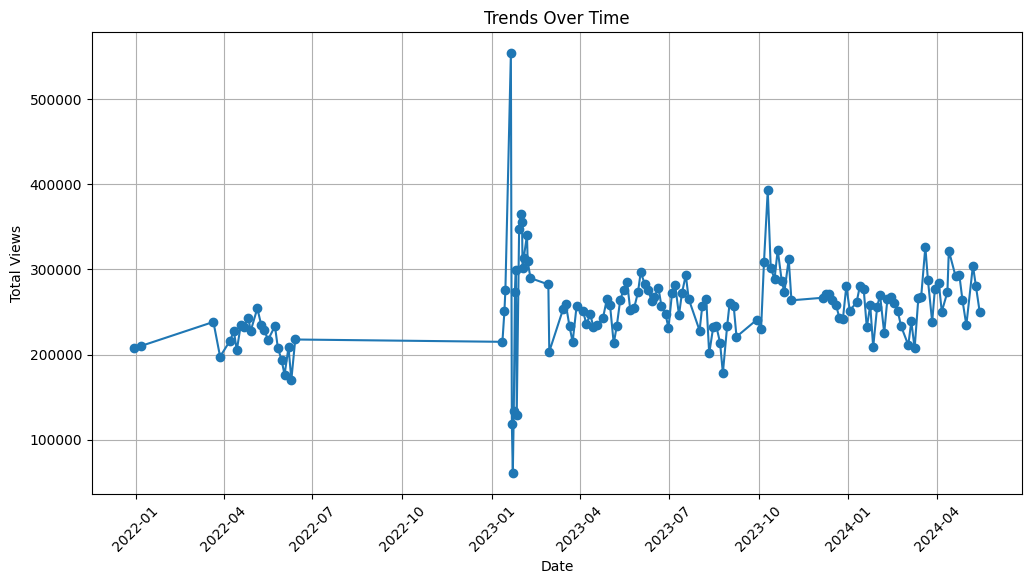

In [49]:
total_views_per_date(Boa_data)

In [50]:

#  Visualization
def plot_visual(Boa_data):
 Boa_data.plot(x='date', y='view', kind='line')
 plt.title('Views Over Time')
 plt.xlabel('Date')
 plt.ylabel('Views')
 plt.show()

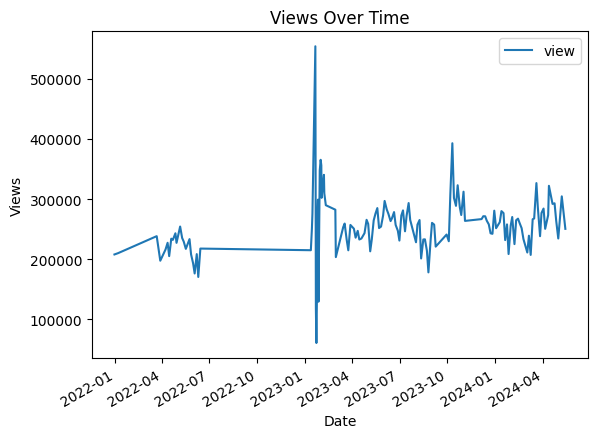

In [51]:
plot_visual(Boa_data)

In [52]:
def time_of_day_count(Boa_data):
 Boa_data['time_of_day'].value_counts().plot(kind='bar')
 plt.title('Post Distribution by Time of Day')
 plt.xlabel('Time of Day')
 plt.ylabel('Count')
 plt.show()

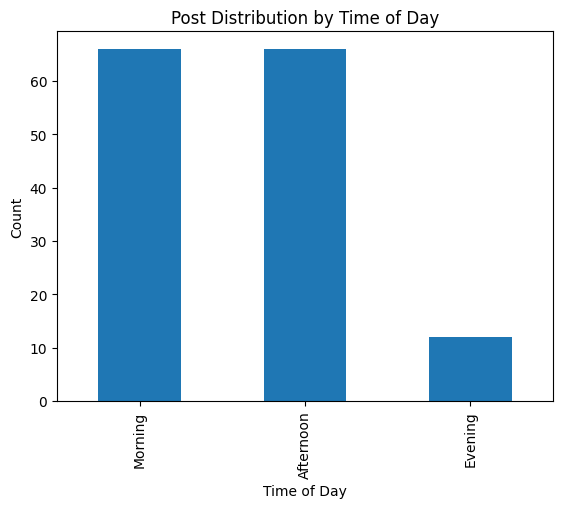

In [53]:
time_of_day_count(Boa_data)

In [56]:
# Sort the 'Post Hour' column in ascending order
def sort_post_by_hour(Boa_data):
    Boa_data.sort_values(by='post_hour', inplace=True)

# Extract the first ten data points of the 'Post Hour' column
    post_hour = Boa_data['post_hour'].head(10)
    view = Boa_data['view']

# Create the first chart - Line chart for 'Post Hour'
    plt.subplot(2, 2, 1)
    plt.plot('post_hour')
    plt.xlabel('Index')
    plt.ylabel('Post Hour')
    plt.title('Post Hour Analysis')

# Adjust the layout and display the chart
    plt.tight_layout()
    plt.show()

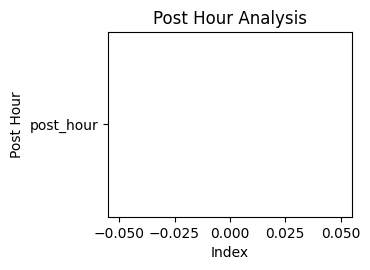

In [57]:
sort_post_by_hour(Boa_data)